# Прогнозирование оттока клиентов фитнес-центра.

**Оглавление**
* [Описание проекта](#description)
* [Получение исходных данных](#reading)
* [Исследовательский анализ данных EDA](#EDA)
* [Формирование прогнозной модели на основе логистической регрессии](#Logisticregression)
* [Формирование прогнозной модели на основе RandomForestClassifier](#Randomforestclassifier)
* [Категоризация клиентов](#clustering)
* [Рекомендации для маркетинговой стратегии по группам клиентов](#marketing)


**Описание проекта**\
Исходные данные представляют собой информацию о клиентах фитнес-центра. Основная проблема  - отток клиентов.
Задачи:
* Сформировать модель прогнозирования оттока (на уровне следующего месяца);
* Сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* Проанализировать основные признаки, наиболее сильно влияющие на отток;
* Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами.

In [1]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=eadcf9304e66533cfb268419829a746452af47a48a68a86486f43bc3ff6e0518
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import scipy.stats as stats
from ydata_profiling import ProfileReport
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

<a name="reading"></a>
**Получение исходных данных**

In [4]:
df = pd.read_csv('gym_churn.csv')

<a name="EDA"></a>
**Исследовательский анализ данных (EDA)**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [6]:
df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [7]:
# Формирование отчета для исследования данных
ProfileReport(df, minimal = True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Пропущенных значений и дубликатов нет. Категориальные данные представлены в числовом формате.

In [8]:
# расчет средних значений признаков для тех кто ушел и остался
df.mean()

gender                                 0.510250
Near_Location                          0.845250
Partner                                0.486750
Promo_friends                          0.308500
Phone                                  0.903500
Contract_period                        4.681250
Group_visits                           0.412250
Age                                   29.184250
Avg_additional_charges_total         146.943728
Month_to_end_contract                  4.322750
Lifetime                               3.724750
Avg_class_frequency_total              1.879020
Avg_class_frequency_current_month      1.767052
Churn                                  0.265250
dtype: float64

In [9]:
# Расчёт средних значений характеристик для тех, кто ушёл, и для тех, кто остался.
df.groupby(by = 'Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Статистика показывает, что меньше всего клиентов уходит от тех, кто живёт или работает поблизости, от сотрудников компаний-партнёров, от тех, кто пришёл по рекомендации друзей, от тех, кто взял длительные абонементы, от людей более старшего возраста, которые в среднем посещают заведение около двух раз в неделю.

In [10]:
# Разделение данных на две группы: отток и активные клиенты
left = df.query('Churn == 1')
stay = df.query('Churn == 0')

In [11]:
# Функция, которая строит графики распределения признаков в зависимости от того, остались люди или ушли.
def col(i):
    table = pd.pivot_table(data = df, index = 'Churn', columns = df.iloc[:,i], values ='Age', aggfunc = 'count').reset_index()
    table.columns=['Churn',df.columns[i]+'_0', df.columns[i]+'_1']
    m=plt.bar(x = table['Churn']-0.1, height = table.iloc[:,1], width = 0.2, label = table.columns[1])
    w=plt.bar(x = table['Churn']+0.1, height = table.iloc[:,2], width = 0.2, label = table.columns[2])
    plt.xticks(ticks = [0,1], labels = ['остались','ушли'])
    plt.legend()
    plt.bar_label(m)
    plt.bar_label(w)
    plt.show()

In [12]:
# номера колонок с категориальными значениями
cat_feature = pd.Series([0,1,2,3,4,6])

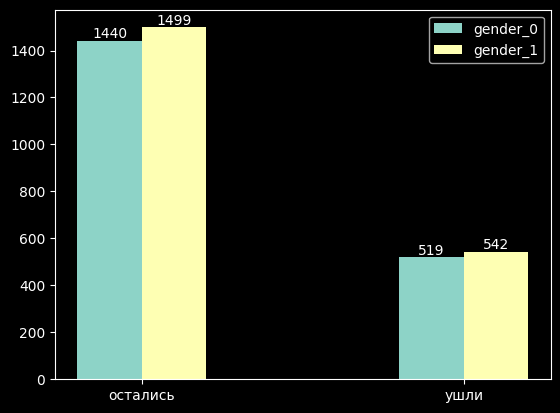

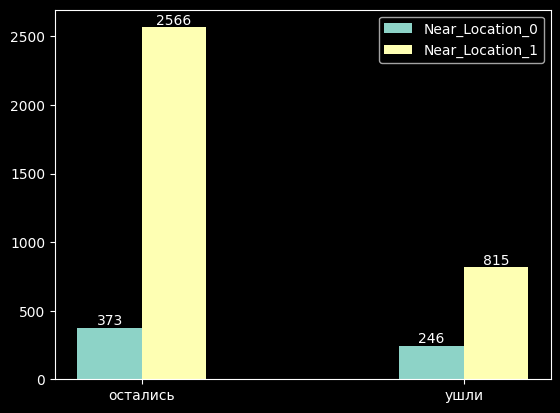

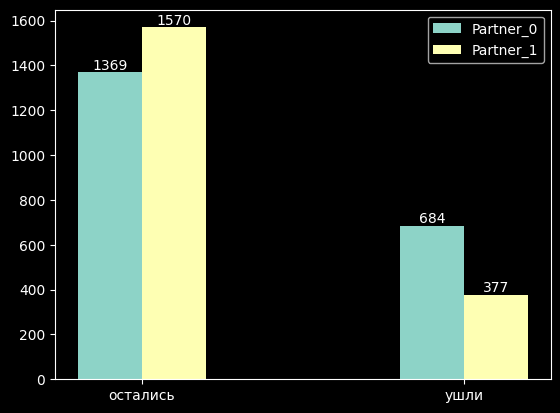

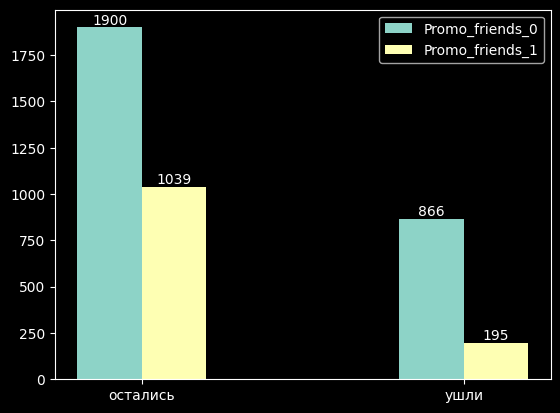

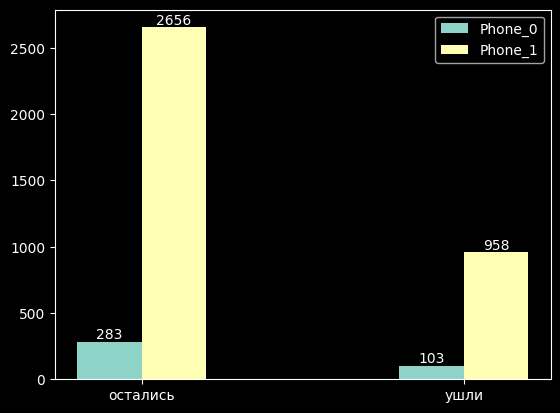

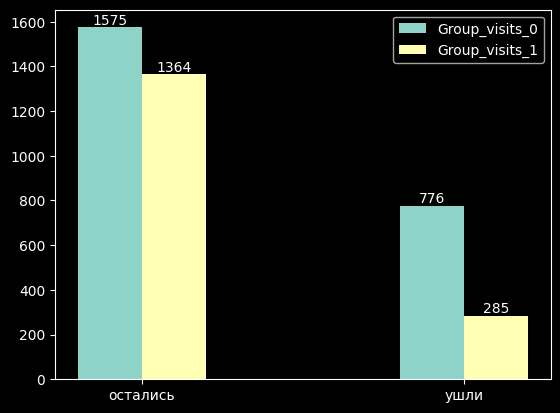

In [13]:
# построение бинарных распределений для категориальных данных в разбивке по группам "остались/ушли"
for i in cat_feature:
    col(i)

Клиенты, которые сотрудничают с компаниями-партнёрами, более благосклонны к нам.

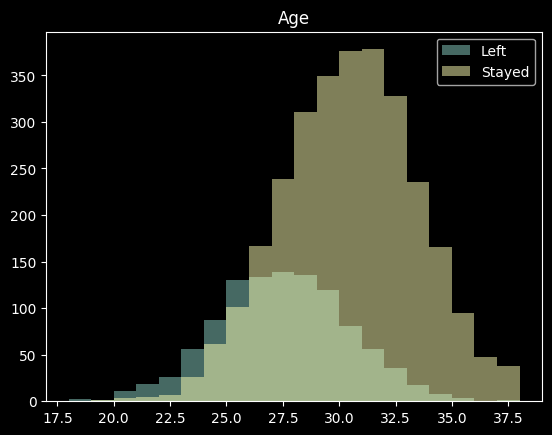

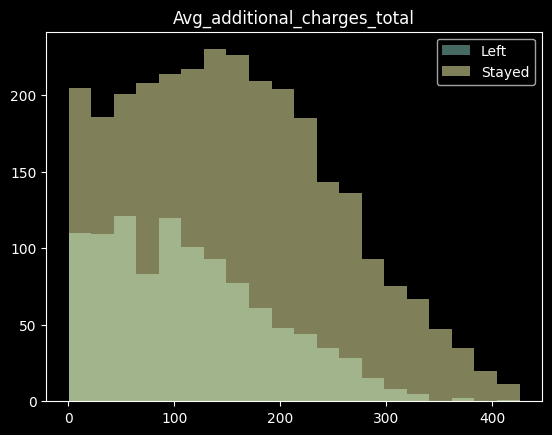

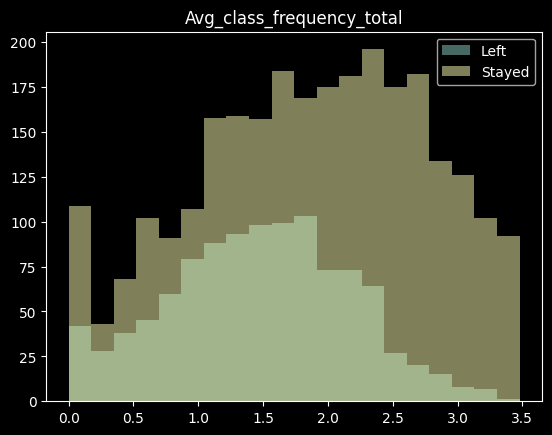

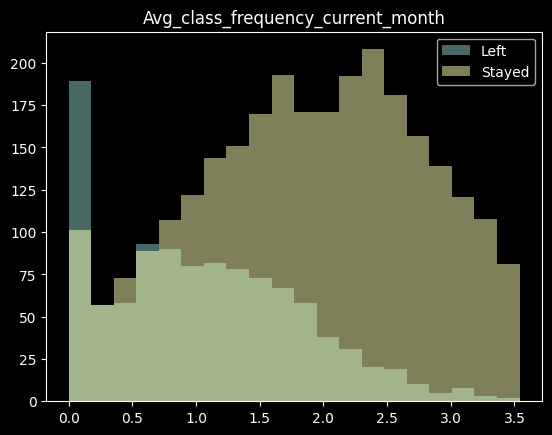

In [14]:
cat_feature_2 = pd.Series([7,8,11,12])
for i in cat_feature_2:
    n,bins, patches = plt.hist(left.iloc[:,i], bins = 20, alpha = 0.5, label = 'Left')
    plt.hist(stay.iloc[:,i], bins = bins,alpha = 0.5, label = 'Stayed')
    plt.legend()
    plt.title(left.columns[i])
    plt.show()

Нулевая посещаемость за текущий месяц, скорее всего, приведёт к оттоку клиентов.

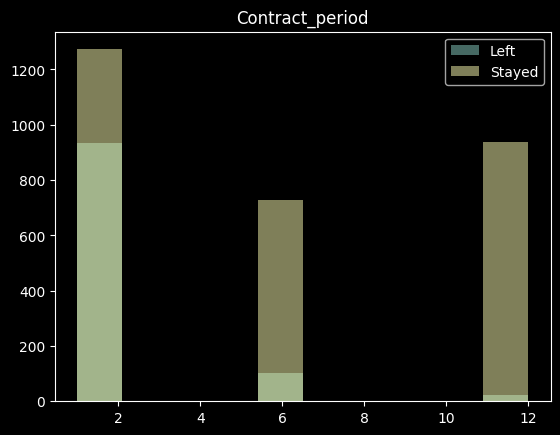

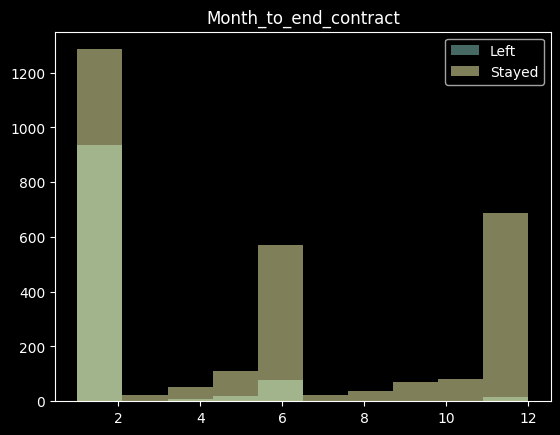

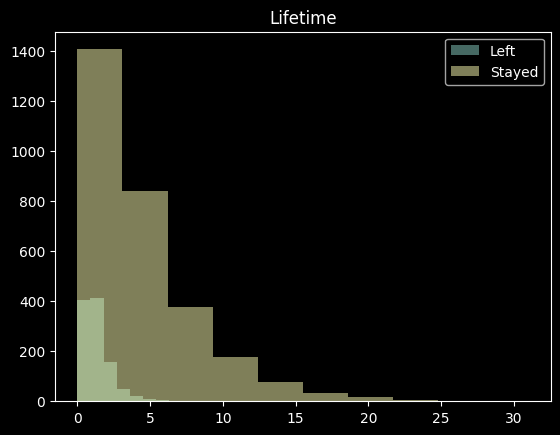

In [15]:
# номера колонок с дискретными признаками
# построение графиков для дискретных признаков
categ3 = pd.Series([5,9,10])
for i in categ3:
    plt.hist(left.iloc[:,i], alpha = 0.5, label = 'Left')
    plt.hist(stay.iloc[:,i], alpha = 0.5, label = 'Stayed')
    plt.legend()
    plt.title(left.columns[i])
    plt.show()

Для группы ушедших клиентов характерен 1-месячный абонемент или окончание абонемента.

<Axes: >

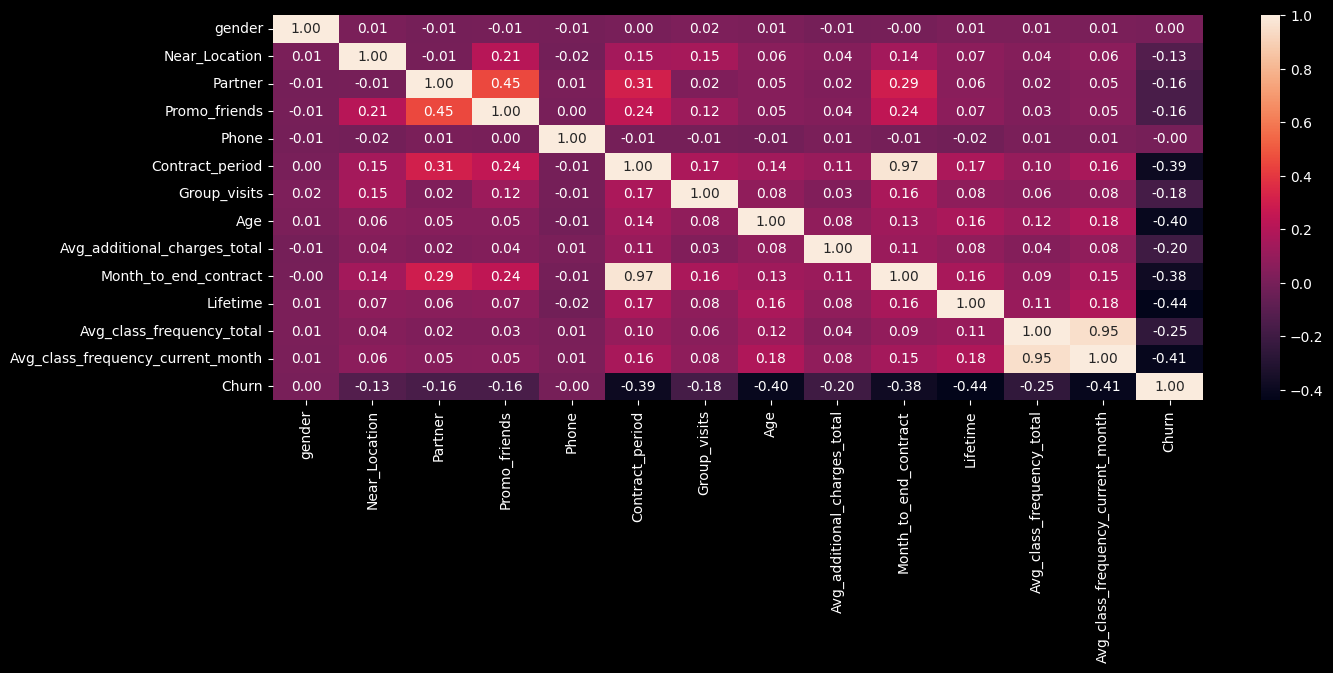

In [16]:
# тепловая карта на основе матрицы корреляций
cor = df.corr()
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(cor, annot = True, fmt = ".2f")

<a name="Logisticregression"></a>
**Создание модели прогнозирования с использованием логистической регрессии.**

In [17]:
X = df.drop('Churn', axis = 1)
y=df['Churn'] # разделение данных на признаки (матрица X) и целевую переменную (y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0) # разделение модели на обучающую и валидационную выборку
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1]
acc = accuracy_score(y_test, predictions)
precision = precision_score (y_test, predictions)
recall = recall_score (y_test, predictions)
print(acc, precision, recall) # вывод на экран метрик, характеризующих качество модели

0.925 0.8631578947368421 0.8282828282828283


<a name="Randomforestclassifier"></a>
**Создание модели прогноза с использованием алгоритма RandomForestClassifier.**

In [18]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score (y_test, y_pred)
recall_rf = recall_score (y_test, y_pred)
print(acc_rf, precision_rf, recall_rf)# вывод на экран метрик, характеризующих качество модели

0.91625 0.8465608465608465 0.8080808080808081


Логистическая регрессия показывает более высокие результаты по метрикам, чем RandomForestClassifier, поэтому её использование для прогнозирования является более предпочтительным.

<a name="clustering"></a>
**Категоризация клиентов**

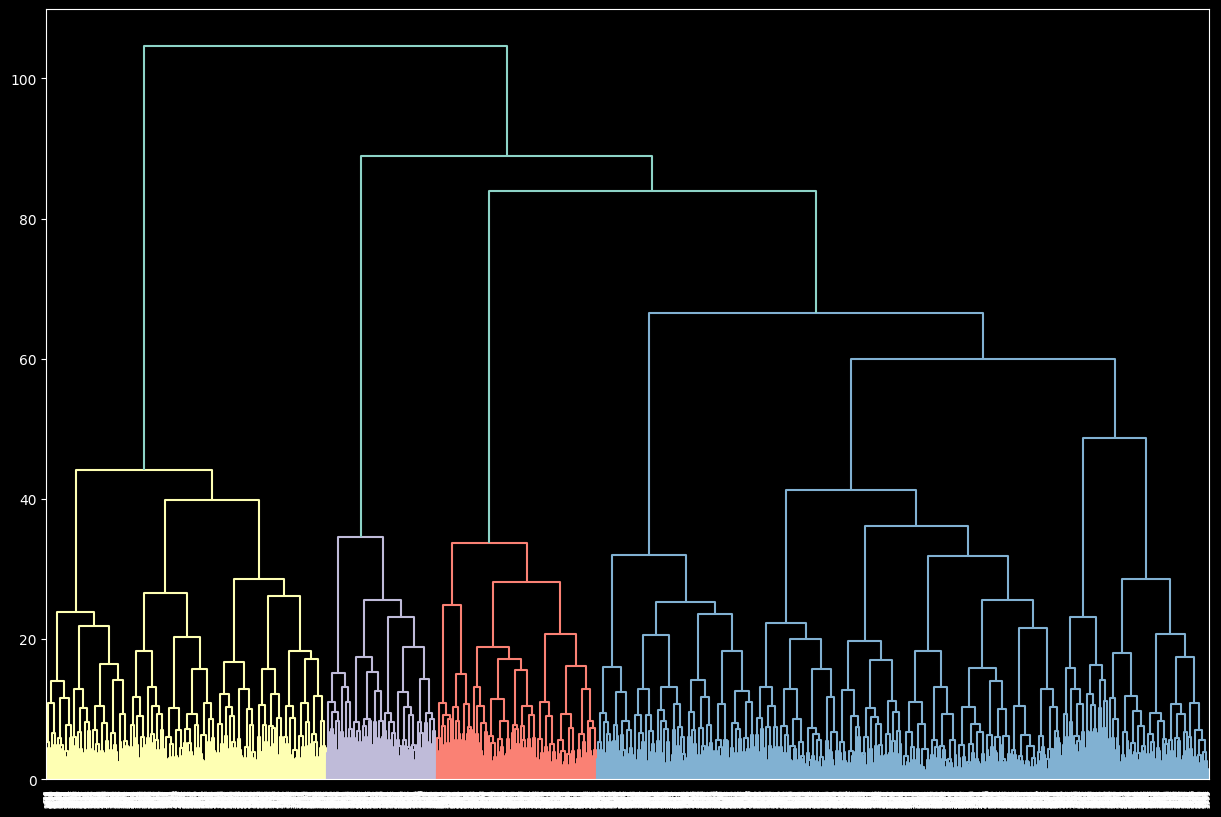

In [19]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.show() # вывод на экран дендрограммы

По дендрограмме видно что у нас 4 кластера

In [20]:
cl = 4 # Количество кластеров было выбрано в соответствии с дендрограммой и на основе анализа нескольких вариантов.
km = KMeans(n_clusters = cl)
labels = km.fit_predict(X_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
 # добавление колонки с категориями
 df['claster']= labels

In [22]:
# формирование сводной таблицы для анализа оттока по категориям
piv = pd.pivot_table(data = df, index = 'claster', columns = 'Churn', values = 'Age', aggfunc = 'count' ).reset_index()
piv.columns = ['claster','Churn_0','Churn_1']
piv['perc'] = piv['Churn_1']/(piv['Churn_0']+piv['Churn_1'])
piv['number']=piv['Churn_1']+piv['Churn_0']
print(piv.head())

   claster  Churn_0  Churn_1      perc  number
0        0      652      830  0.560054    1482
1        1      283      103  0.266839     386
2        2      957       96  0.091168    1053
3        3     1047       32  0.029657    1079


Отток клиентов значительно варьируется в зависимости от кластера.

In [23]:
left = df.query('Churn == 1')
stay = df.query('Churn == 0')

In [24]:
categ_cat = pd.Series(np.arange(0,cl,1))
print(categ_cat)
print(cat_feature_2)

0    0
1    1
2    2
3    3
dtype: int64
0     7
1     8
2    11
3    12
dtype: int64


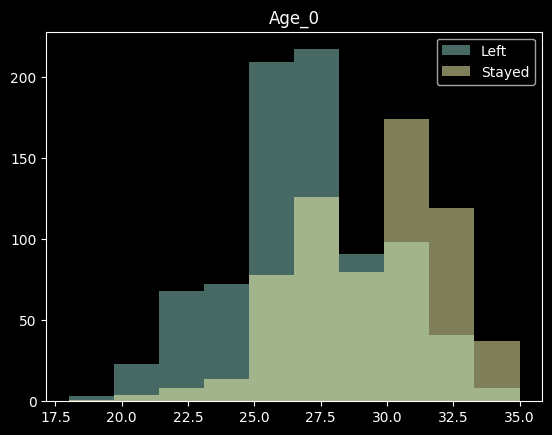

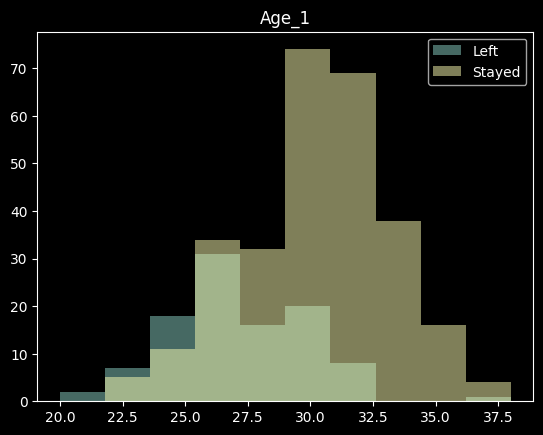

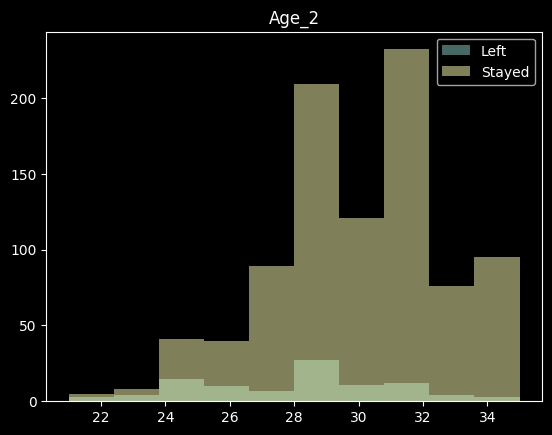

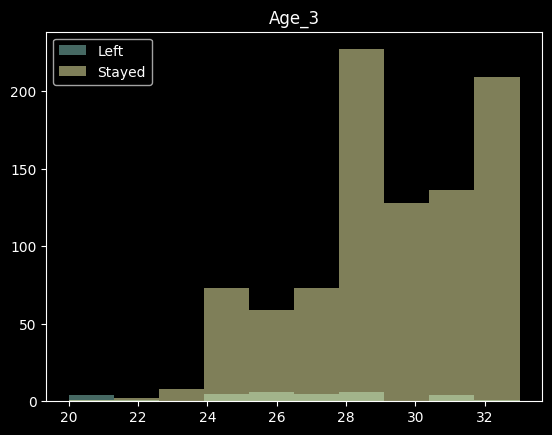

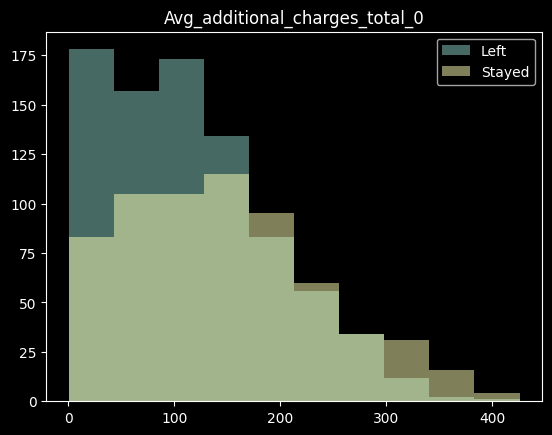

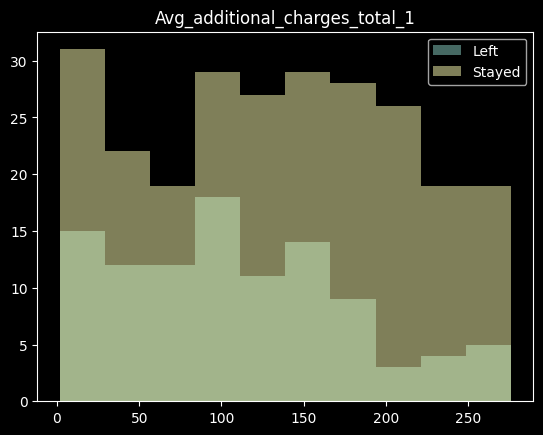

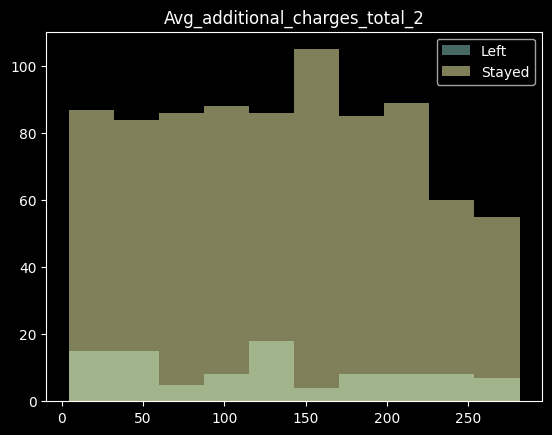

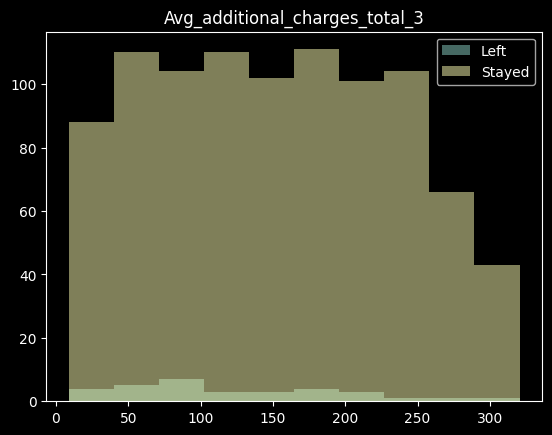

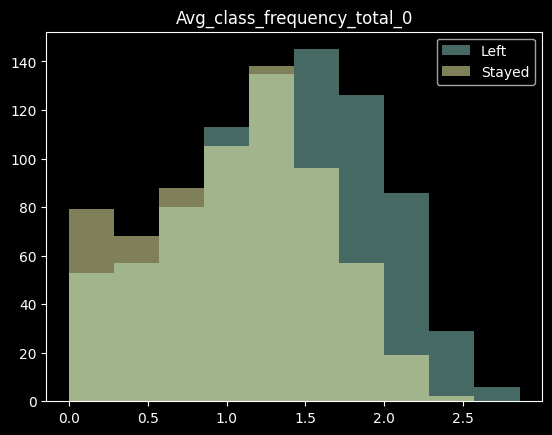

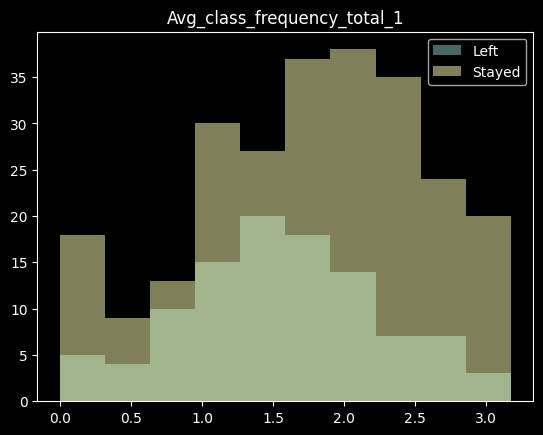

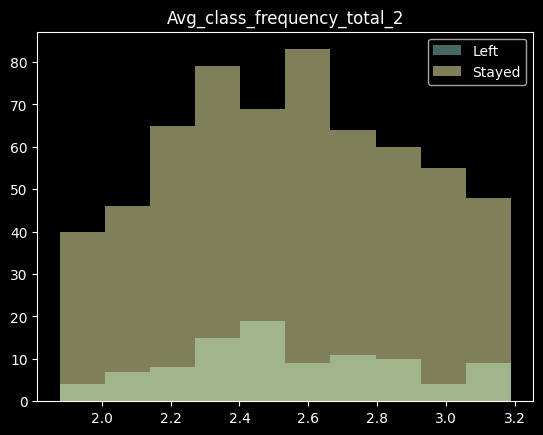

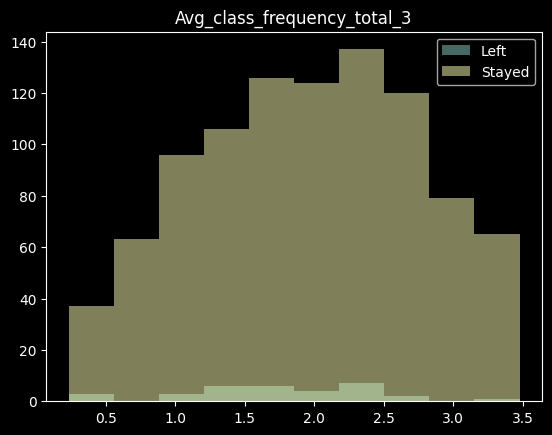

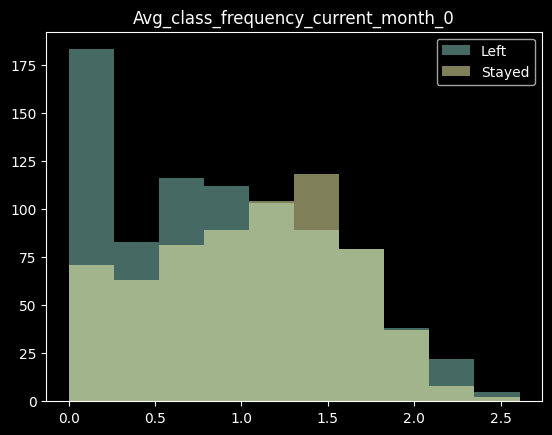

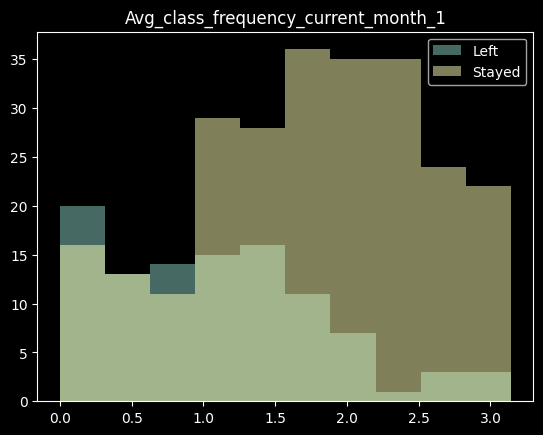

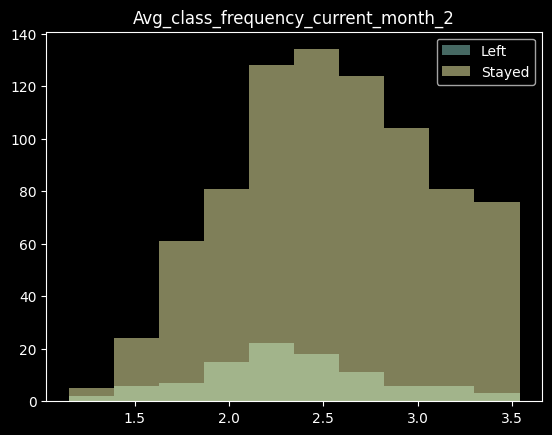

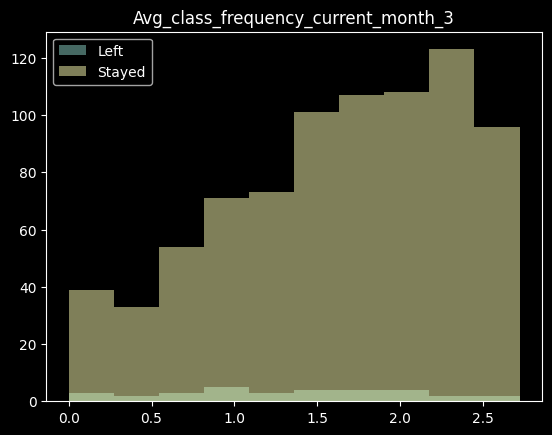

In [25]:
for i in cat_feature_2:
    for j  in categ_cat:
        n,bins, patches = plt.hist(left[left['claster'] == j].iloc[:,i], bins = 10, alpha = 0.5, label = 'Left')
        plt.hist(stay[stay['claster'] == j].iloc[:,i], bins = bins,alpha = 0.5, label = 'Stayed')
        plt.legend()
        plt.title(left.columns[i]+'_%i' %j)
        plt.show()

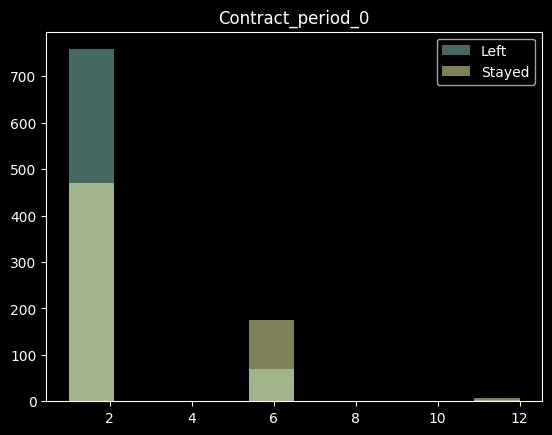

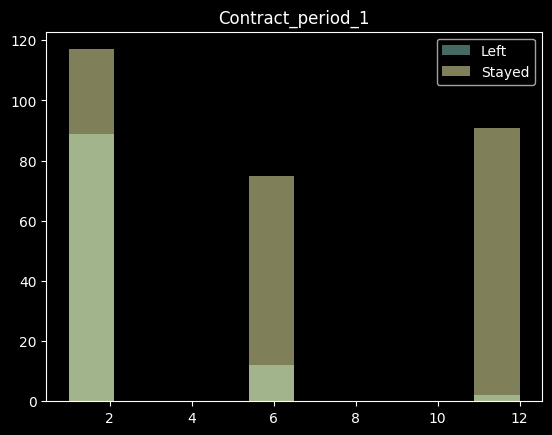

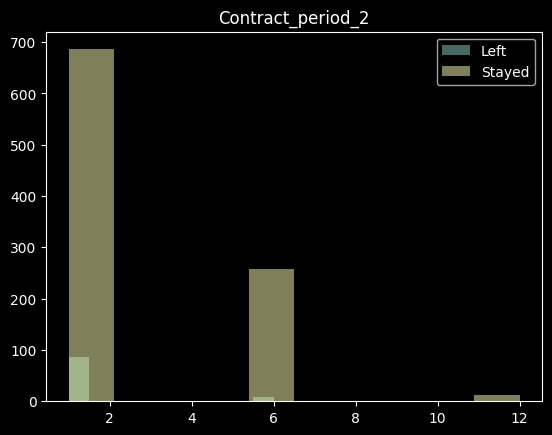

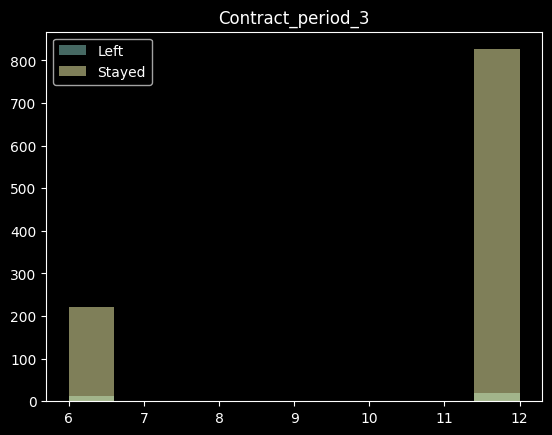

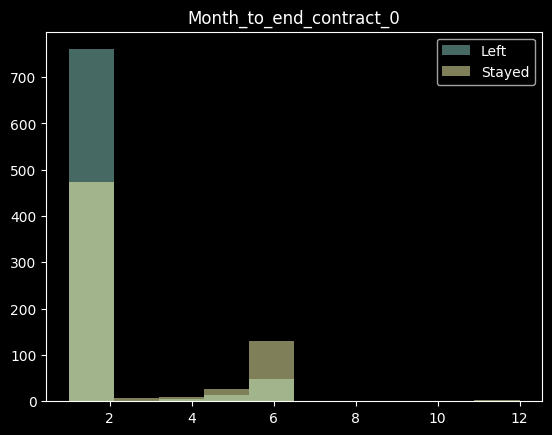

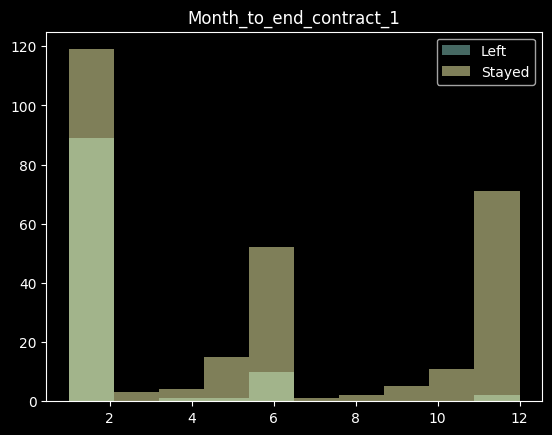

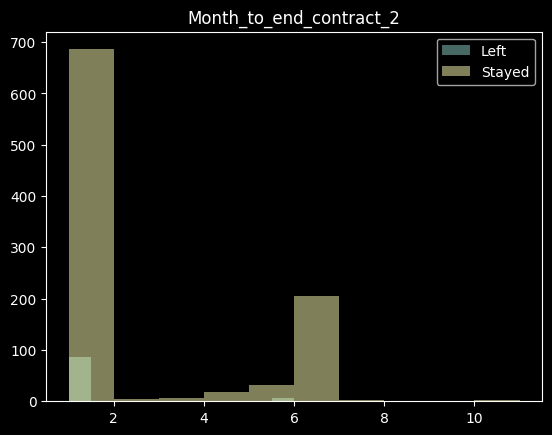

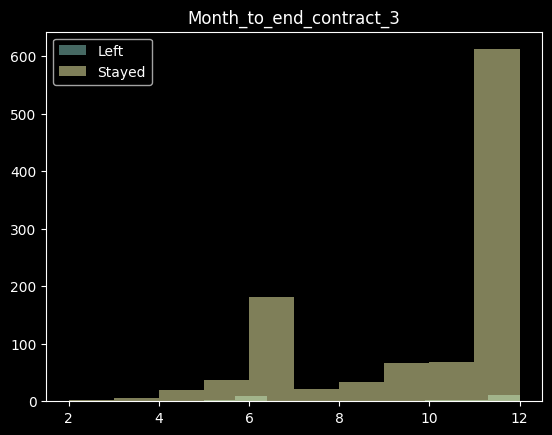

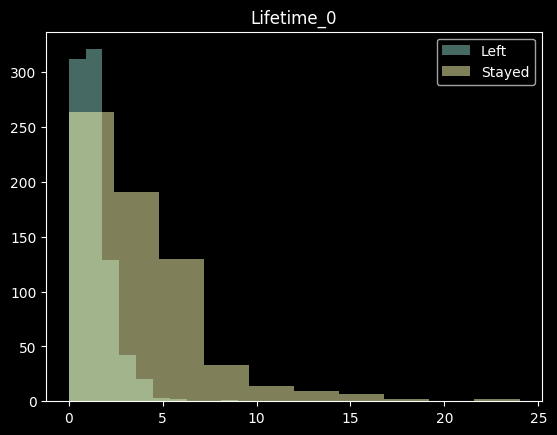

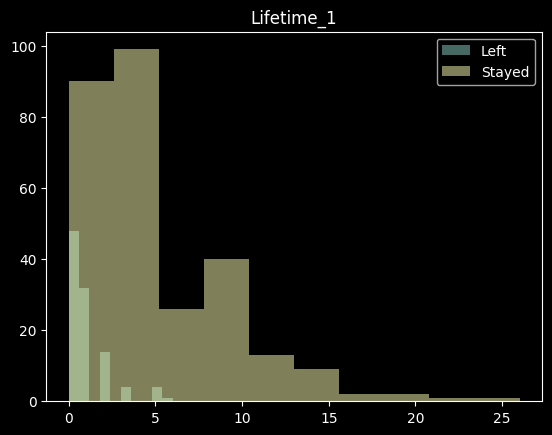

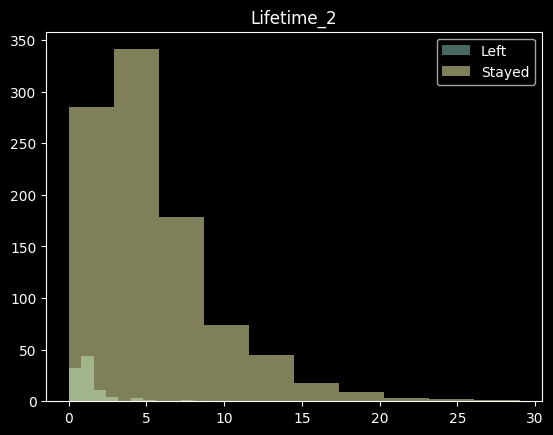

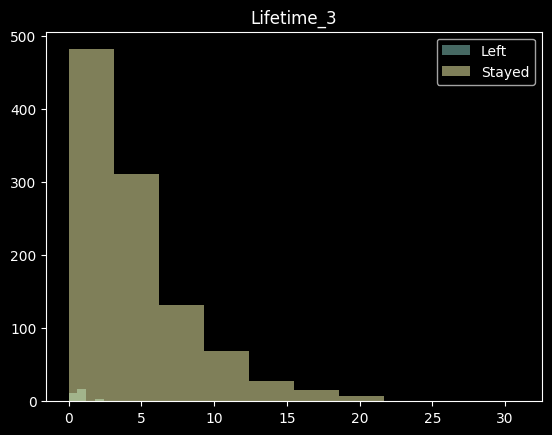

In [26]:
for i in categ3:
    for j  in categ_cat:
        plt.hist(left[left['claster'] == j].iloc[:,i], alpha = 0.5, label = 'Left')
        plt.hist(stay[stay['claster'] == j].iloc[:,i],alpha = 0.5, label = 'Stayed')
        plt.legend()
        plt.title(left.columns[i]+'_%i' %j)
        plt.show()

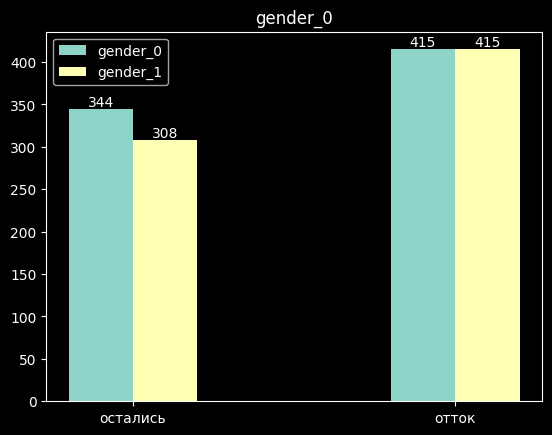

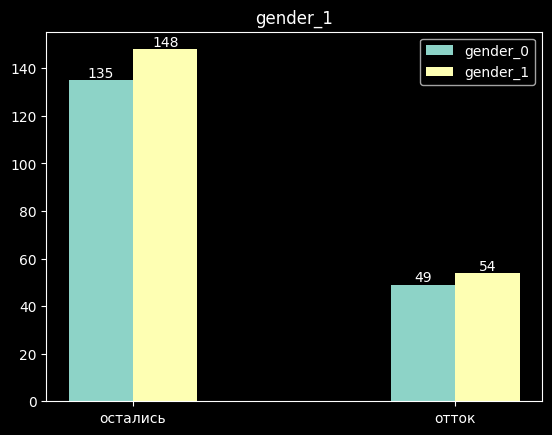

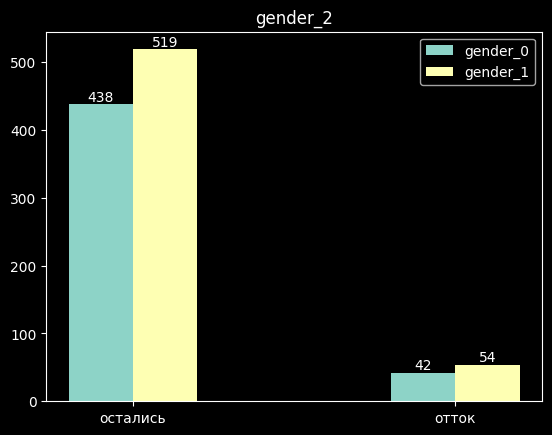

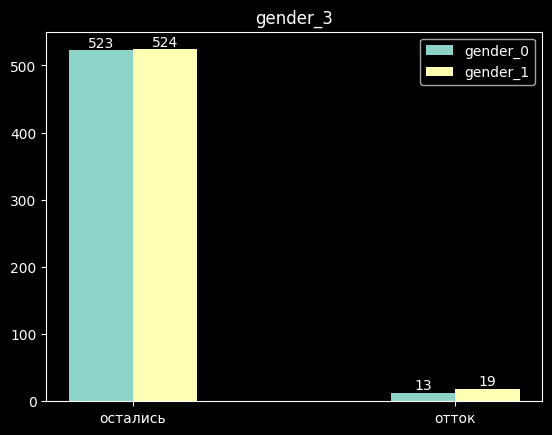

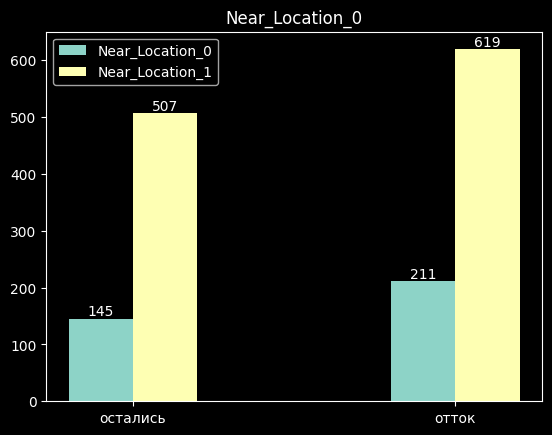

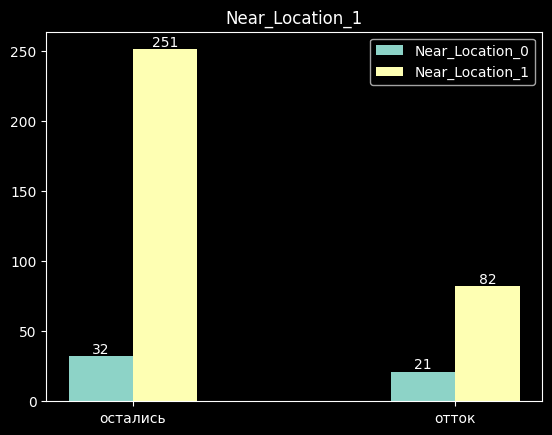

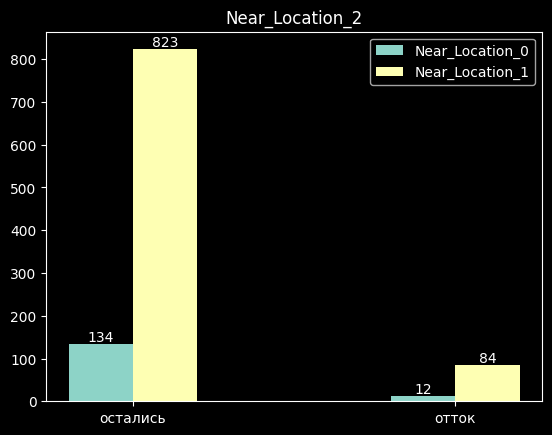

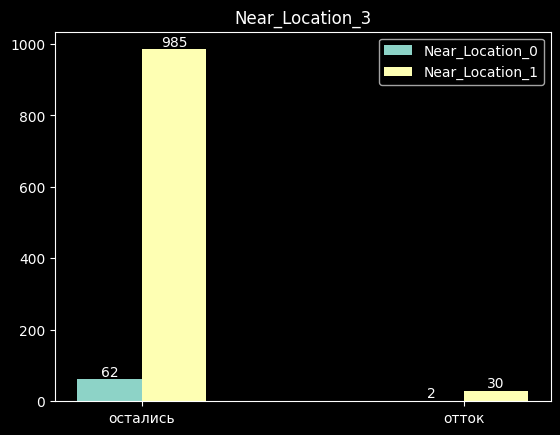

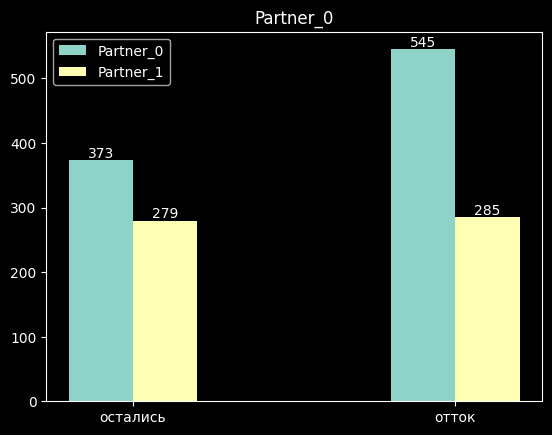

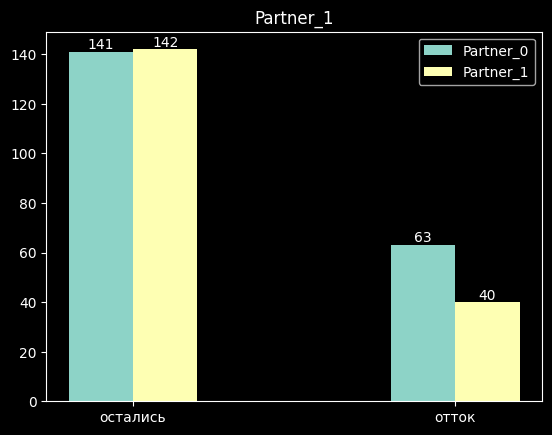

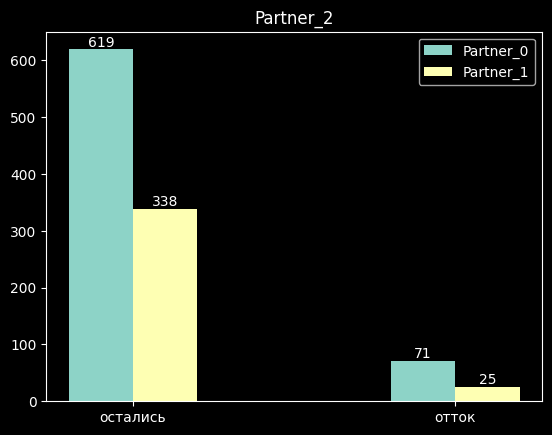

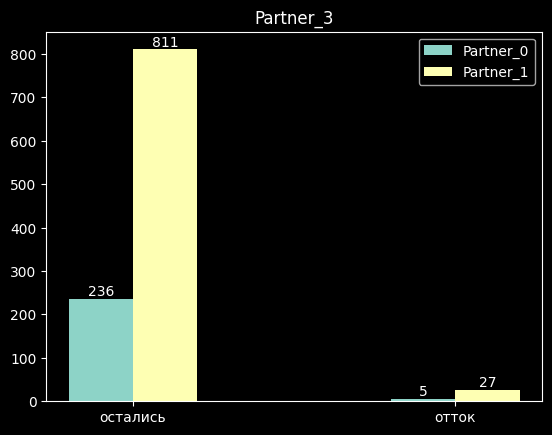

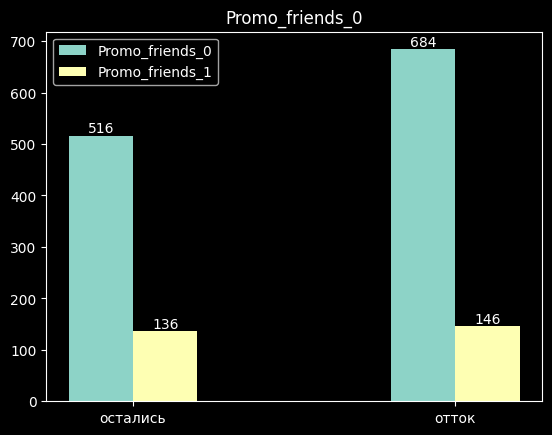

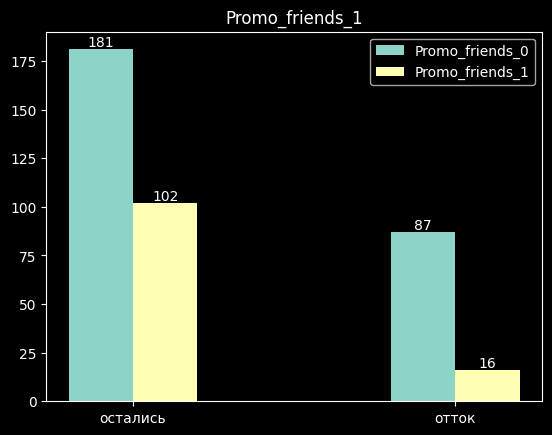

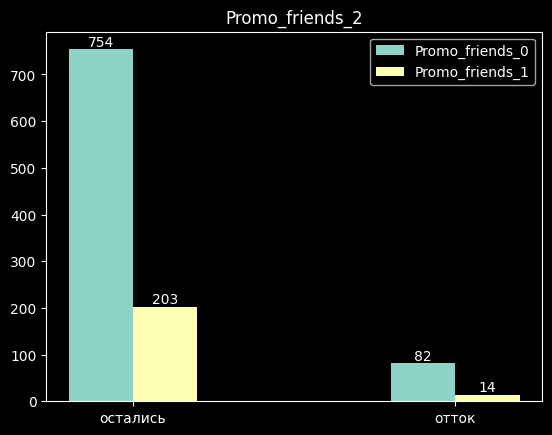

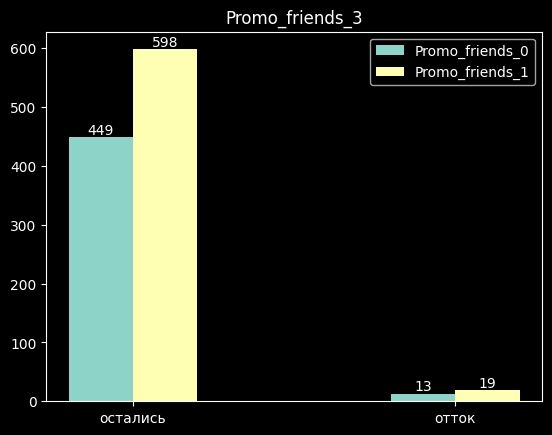

ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

In [28]:
for i in cat_feature:
    for j in categ_cat:
        pivo = pd.pivot_table(data = df[df['claster']==j], index = 'Churn', columns = df.iloc[:,i], values ='Age', aggfunc = 'count').reset_index()
        pivo.columns=['Churn',df.columns[i]+'_0', df.columns[i]+'_1']
        m=plt.bar(x = pivo['Churn']-0.1, height = pivo.iloc[:,1], width = 0.2, label = pivo.columns[1])
        w=plt.bar(x = pivo['Churn']+0.1, height = pivo.iloc[:,2], width = 0.2, label = pivo.columns[2])
        plt.xticks(ticks = [0,1], labels = ['остались','отток'])
        plt.legend()
        plt.bar_label(m)
        plt.bar_label(w)
        plt.title(df.columns[i]+'_%i' %j)
        plt.show()

<Axes: >

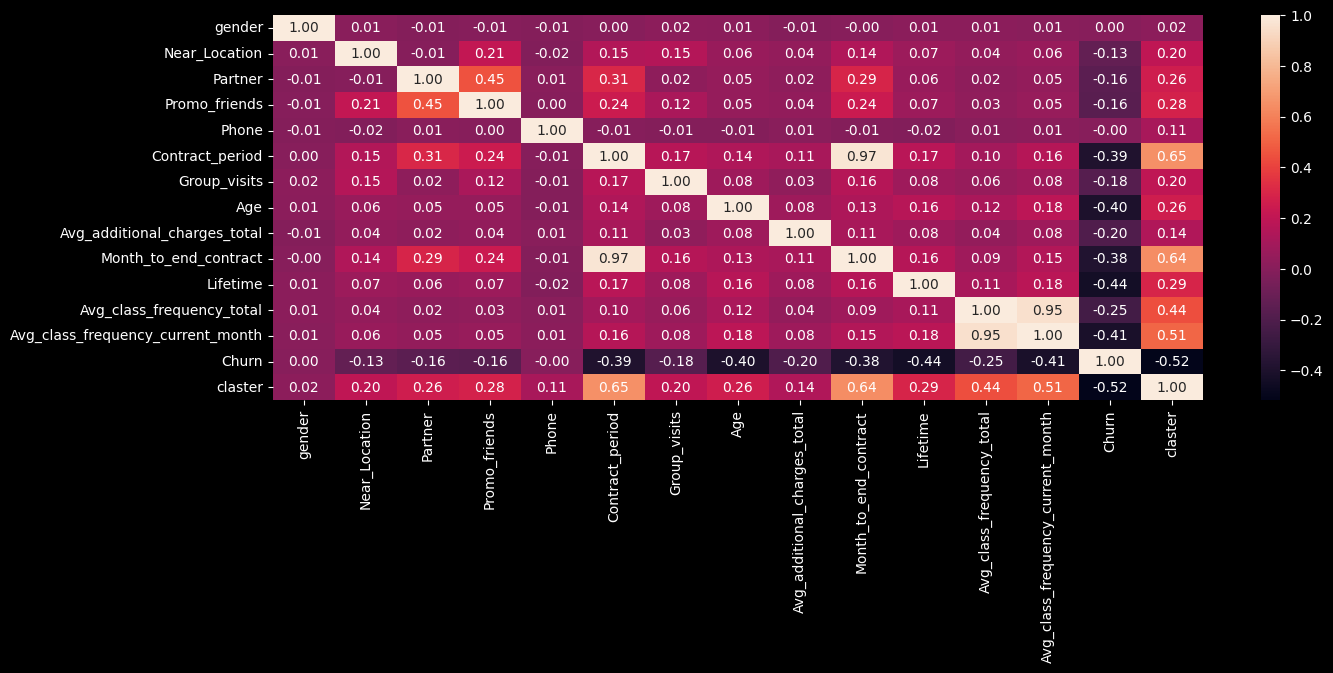

In [29]:
cor = df.corr()
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(cor, annot = True, fmt = ".2f")

In [30]:
df.groupby(by = 'claster').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
claster,,,,,,,,,,,,,,
0,0.487854,0.759784,0.380567,0.190283,1.0,1.893387,0.292173,28.045209,129.707027,1.798920,2.235493,1.208435,0.954712,0.560054
1,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
2,0.544160,0.861349,0.344729,0.206078,1.0,2.403609,0.448243,30.005698,157.550256,2.241216,4.713200,2.726303,2.714123,0.091168
3,0.503244,0.940686,0.776645,0.571826,1.0,10.698795,0.536608,29.906395,161.245895,9.769231,4.728452,1.982073,1.973959,0.029657


<a name="marketing"></a>
**Рекомендации для маркетинговой стратегии по группам клиентов:**

**Группа 0: фитнес-клуб рядом с домом или работой. Короткий абонемент. Высокий отток клиентов.**

Эта группа имеет наибольший потенциал для удержания клиентов. Поэтому ей требуется максимальное внимание и фокус.

**Предлагаемые маркетинговые действия:**
* Предложение скидок на долгосрочные абонементы.
* Стимулирование клиентов приводить друзей.

**Группа 1: фитнес-клуб не расположен рядом с домом или работой, но его посещают сотрудники компаний-партнёров.**

У этой группы абонемент средней продолжительности, а отток клиентов низкий. Это самая лояльная группа.

**Предлагаемые маркетинговые действия:**
* Сосредоточить усилия на предложении дополнительных услуг.

**Рекламная стратегия для всех групп:**
* Охват аудитории, которая живёт или работает рядом с фитнес-клубом.
* Рассылка предложений о продлении абонемента клиентам, срок действия которого менее 1 месяца.
* Аналогичные рассылки для ушедших клиентов.
* Расширение взаимодействия с компаниями-партнёрами.